# Project 4 : Predictive Analysis using scikit-learn

## Jinming Chen, Alejandra Zapata

# Introduction 

This project analyzes data related to mushrooms to find the attributes that are the best predictors of whether a particular mushroom is poisonous or edible. The goal of this project is to build a model that determines if mushrooms are edible or poisonous by specific attributes. We chose three relevant attributes in addition to "Odor" to create different predictive models. The chosen attributes were "Cap Color", "Gill Color" and "Habitat".

We use a brief article from the website 'Wild Food' to inform our choice of attributes. The colors and habitats play a signifcant role according to the source and on this project we will determine the role they have on this dataset.

* Dataset link: https://archive.ics.uci.edu/ml/datasets/mushroom

* Mushrooms Article: https://www.wildfooduk.com/articles/how-to-tell-the-difference-between-poisonous-and-edible-mushrooms/#:~:text=First%2C%20is%20there%20any%20red,again%20treat%20it%20as%20poisonous.

# Research Question 
* Which other attributes (i.e., aside from the poisonous/edible indicator) or attributes are the best predictors of whether a particular mushroom is poisonous or edible?”

# Phase I: Data Acquisition and Data Preparation 

In [188]:
# Importing the Pandas library
import pandas as pd
# Importing the matplotlib
import matplotlib.pyplot as plt
# Importing the seaborn
import seaborn as sns
# Importing the numpy
import numpy as np

# load the library
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [189]:
# Importing data from Github
df = pd.read_csv('https://raw.githubusercontent.com/AlejandraZS10/Project-4-AIM-5001-200/main/agaricus-lepiota.data.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


The complete datset contains 8124 rows and 23 columns. For this project we select only three that have proven to be signifcant according to the previously mentioned article from 'Wild Mushroom'.

In [190]:
# Selecting the columns for the analysis
dt=pd.DataFrame(df, columns=[0, 3, 5, 9, 22])

# Rename the columns for easier to understand
dt_mushroom = dt.rename(columns = {0: 'Class', 3: 'Cap_Color', 5:'Odor', 9:'Gill_Color', 22:'Habitat'})

dt_mushroom

,Class,Cap_Color,Odor,Gill_Color,Habitat
0,p,n,p,k,u
1,e,y,a,k,g
2,e,w,l,n,m
3,p,w,p,n,u
4,e,g,n,k,g
...,...,...,...,...,...
8119,e,n,n,y,l
8120,e,n,n,y,l
8121,e,n,n,n,l
8122,p,n,y,b,l


In [191]:
# Dsecribe the dataset
dt_mushroom.describe()

,Class,Cap_Color,Odor,Gill_Color,Habitat
count,8124,8124,8124,8124,8124
unique,2,10,9,12,7
top,e,n,n,b,d
freq,4208,2284,3528,1728,3148


As the above description shows, there are 4028/8124 edible mushrooms in the dataset.  
* The most common cap color is n = brown (2284) and there are 10 unique values.
* The most repeated gill color is b = buff (1728) and there are 12 unique values.
* The top odor is none (3528) and there is 9 unique values.
* The most common habitat is d = woods (3148) and there are 7 unique values. 

# Exploratory Data Analysis (EDA)

### 1. Class Distribution

Text(0.5, 1.0, 'Counts of  Mushrooms that edible or poisonous')

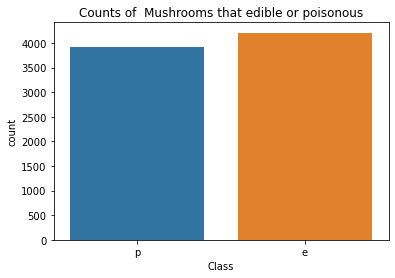

In [192]:
#The plot of the counts of  Mushrooms that edible or poisonous
sns.countplot(x="Class", data=dt_mushroom)
plt.title('Counts of  Mushrooms that edible or poisonous')

#### The percent of mushrooms that are edible or poisonous

In [193]:
# Calculating the percentage
(dt_mushroom["Class"].value_counts()/dt_mushroom["Class"].count())*100

e    51.797144
p    48.202856
Name: Class, dtype: float64

* The distribution of the dataset is 51% edible mushrooms and 48% poisonous.

### 2. Odor Distribution

Text(0.5, 1.0, 'The distribution of the Odor')

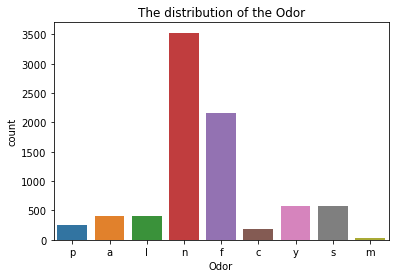

In [194]:
# The distribution of the "Odor"
sns.countplot(x="Odor", data=dt_mushroom)
plt.title('The distribution of the Odor')

* Odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

#### The percent of each variables of Odor 

In [195]:
(dt_mushroom["Odor"].value_counts()/dt_mushroom["Odor"].count())*100

n    43.426883
f    26.587888
s     7.090103
y     7.090103
a     4.923683
l     4.923683
p     3.151157
c     2.363368
m     0.443131
Name: Odor, dtype: float64

#### In conclusion, none-odor (n) has the most counts in the "odor" column, and musty  (m) has the  least counts. The mushroom with the second highest count is foul (f).

### 3. Cap Color Distribution

Text(0.5, 1.0, 'The distribution of the cap color')

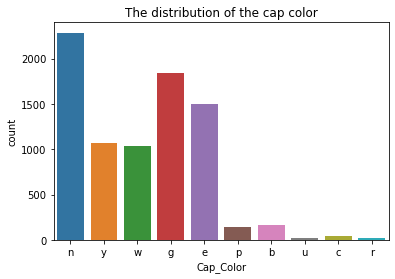

In [196]:
# The distribution of the cap color
sns.countplot(x="Cap_Color", data=dt_mushroom)
plt.title('The distribution of the cap color')

* cap-color:brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

#### The percent of each variable of cap color 

In [197]:
(dt_mushroom["Cap_Color"].value_counts()/dt_mushroom["Cap_Color"].count())*100

n    28.114229
g    22.648941
e    18.463811
y    13.195470
w    12.801576
b     2.067947
p     1.772526
c     0.541605
r     0.196947
u     0.196947
Name: Cap_Color, dtype: float64

#### In conclusion, brown (n) is the most common cap color in the dataset, and green (r) and purple (u) is the least common color. Green (g) and red (e) are the second and third with the highest count.

### 4. Gill Color Distribution

Text(0.5, 1.0, 'The distribution of the gill color')

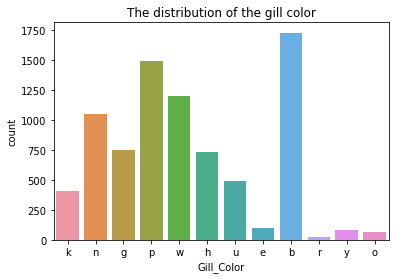

In [198]:
#The distribution of the gill color
sns.countplot(x="Gill_Color", data=dt_mushroom)
plt.title('The distribution of the gill color')

* gill-color:black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

#### The percent of each variables of gill color

In [199]:
(dt_mushroom["Gill_Color"].value_counts()/dt_mushroom["Gill_Color"].count())*100

b    21.270310
p    18.365337
w    14.795667
n    12.900049
g     9.256524
h     9.010340
u     6.056130
k     5.022157
e     1.181684
y     1.058592
o     0.787789
r     0.295421
Name: Gill_Color, dtype: float64

#### In conclusion, from the 12 different gill colors the buff (b)is the most common color of the gill  and green (r) is the least common.  Pink (p) and white (w) are second and third with the highest count.

### 5. Habitat Distribution

Text(0.5, 1.0, 'The distribution of the Habitat')

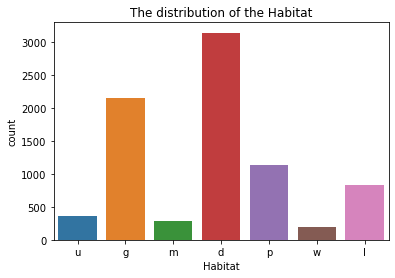

In [200]:
# The distribution of the Habitat
sns.countplot(x="Habitat", data=dt_mushroom)
plt.title('The distribution of the Habitat')

* habitat:grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

#### The percent of each variables of habitat

In [201]:
(dt_mushroom["Habitat"].value_counts()/dt_mushroom["Habitat"].count())*100

d    38.749385
g    26.440177
p    14.081733
l    10.241260
u     4.529788
m     3.594289
w     2.363368
Name: Habitat, dtype: float64

#### In conclusion, woods (d) is the most common habitat for mushrooms, and waste (w) is the least common  habitat. 

## Distribution of  Edible Mushrooms or Poisonous  Mushrooms by each Column

### 6. Odor & Class

Text(0.5, 1.0, 'The distribution of  Edible Mushrooms or Poisonous Mushrooms in Odor')

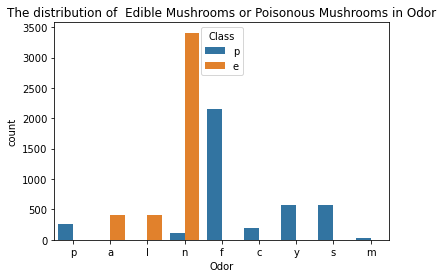

In [202]:
#class vs odor
sns.countplot(x="Odor", hue="Class", data=dt_mushroom)
plt.title('The distribution of  Edible Mushrooms or Poisonous Mushrooms in Odor')

#### If the mushroom has no other, none (n), or it has almond (a) or anise (l) odor, it very likely is an edible mushroom. 
#### On the other hand, if the mushroom has a pungent (p), fishy (y), foul (f), spicy (s), or musty (m) odor, it probably a poisonous mushroom.

### 7. Cap Color & Class

Text(0.5, 1.0, 'The distribution of  Edible Mushrooms or Poisonous Mushrooms in Cap color')

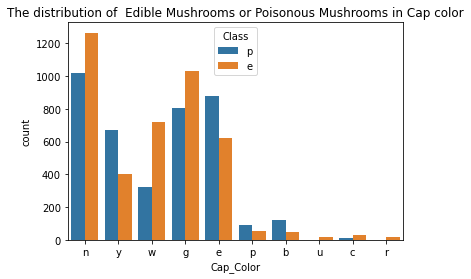

In [203]:
#class vs Cap color
sns.countplot(x="Cap_Color", hue="Class", data=dt_mushroom)
plt.title('The distribution of  Edible Mushrooms or Poisonous Mushrooms in Cap color')

#### For all the values the class is distributed amongst both poisonous and edible so it may not be a good predictive model. Only purple (u) and green (r) are only edible however the sample size is very small to have a signifcant prediction for these two colors.

### 8. Gill color & Class

Text(0.5, 1.0, 'The distribution of  Edible Mushrooms or Poisonous Mushrooms in gill color')

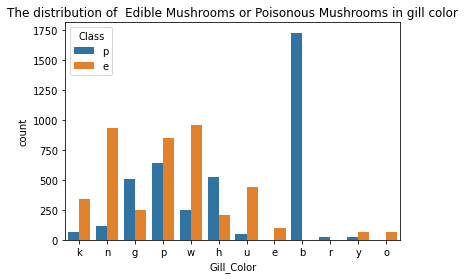

In [204]:
#class vs gill color
sns.countplot(x="Gill_Color", hue="Class", data=dt_mushroom)
plt.title('The distribution of  Edible Mushrooms or Poisonous Mushrooms in gill color')

#### This graph shows the samples with buff (b) gill color they are all poisonous. For greay (g) and chocolate (h) the count of poisonous is much higher than the edible indicating that this colors are more likely to be poisonous. In the case of brown (n), black (k), white (w) and purple (u) the number of edible mushrooms is significantly higher which could be an indication of a good predictive model. This attribute could be a good predictive model but is not as accurate as odor.

### 9. Habitat & Class

Text(0.5, 1.0, 'The distribution of  Edible Mushrooms or Poisonous Mushrooms in Habitat')

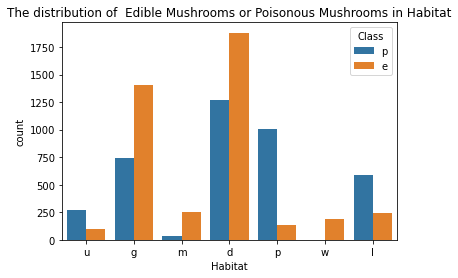

In [205]:
#class vs Habitat
sns.countplot(x="Habitat", hue="Class", data=dt_mushroom)
plt.title('The distribution of  Edible Mushrooms or Poisonous Mushrooms in Habitat')

#### For this graph, grass (g) and woods (d) the number of edible mushrooms is higher than the poisonous but there is still a good number of p values. For paths (p), urban (u) and leaves (l) almost all the values are poisonous. Because there are some significant differences it could be a good predictive model but we need to test it first. It's still not as signifcant as the odor attribute.

## Creating Dummy Variables

* We create dummy variables for all of our categorical data using pd_get.dummies( )
* For the class column that determiens if it is edible or poisonous we create a binary indicator using replace( )

In [206]:
# Converting the "e" and "p" indicators to digits

dt_mushroom['Class'] = dt_mushroom['Class'].replace('p', 0)
dt_mushroom['Class'] = dt_mushroom['Class'].replace('e', 1)
dt_mushroom

,Class,Cap_Color,Odor,Gill_Color,Habitat
0,0,n,p,k,u
1,1,y,a,k,g
2,1,w,l,n,m
3,0,w,p,n,u
4,1,g,n,k,g
...,...,...,...,...,...
8119,1,n,n,y,l
8120,1,n,n,y,l
8121,1,n,n,n,l
8122,0,n,y,b,l


In [207]:
#Checking the data types
dt_mushroom.dtypes

Class          int64
Cap_Color     object
Odor          object
Gill_Color    object
Habitat       object
dtype: object

In [208]:
#creates copy of the original data subset
dt_mushroom2 = dt_mushroom.copy()


# create a new "0/1" binary indicator variable for each categorical data value
dummy = pd.get_dummies(dt_mushroom2)
dummy.head(10)

,Class,Cap_Color_b,Cap_Color_c,Cap_Color_e,Cap_Color_g,Cap_Color_n,Cap_Color_p,Cap_Color_r,Cap_Color_u,Cap_Color_w,...,Gill_Color_u,Gill_Color_w,Gill_Color_y,Habitat_d,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Phase II: Build Predictive Models 

* Now we are going to run a regression model on it to determine which attribute is the best predictor of whether a given mushroom is poisonous or edible.

In [209]:
#Check to see if any null value existed

dt_mushroom.isnull().sum()

Class         0
Cap_Color     0
Odor          0
Gill_Color    0
Habitat       0
dtype: int64

 #### The percent of  mushrooms that are edible

In [210]:
#check the null error percent
dt_mushroom.Class.values.sum()/dt_mushroom.shape[0]

0.517971442639094

* Using the null error rate we determine that 48% of the mushrooms are poisonous and 51% are edible. We do this to as a base and if our model exceeds then it is generating value.

# Test 1: Individual Predictions

## Model 1.1: Odor

In [211]:
# Choose the odor to do the predict with the edible as x
x = dummy[['Odor_a','Odor_p','Odor_l','Odor_n','Odor_f','Odor_c','Odor_y','Odor_s','Odor_m']]

x.head(5)

,Odor_a,Odor_p,Odor_l,Odor_n,Odor_f,Odor_c,Odor_y,Odor_s,Odor_m
0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [212]:
# Choose Class as y value
y = dummy['Class']

y.head(5)

0    0
1    1
2    1
3    0
4    1
Name: Class, dtype: int64

In [213]:
# To split train set and test set
train_x,test_x,train_y,test_y = train_test_split(x, y, random_state=1)

train_x.head(5)

,Odor_a,Odor_p,Odor_l,Odor_n,Odor_f,Odor_c,Odor_y,Odor_s,Odor_m
6253,0,0,0,0,0,0,0,1,0
2739,0,0,0,1,0,0,0,0,0
7436,0,0,0,0,0,0,1,0,0
6339,0,0,0,0,1,0,0,0,0
4654,0,0,0,0,1,0,0,0,0


In [214]:
test_x.head(5)

,Odor_a,Odor_p,Odor_l,Odor_n,Odor_f,Odor_c,Odor_y,Odor_s,Odor_m
1392,0,0,0,1,0,0,0,0,0
4051,0,0,0,0,0,1,0,0,0
3725,0,0,0,0,0,1,0,0,0
7177,0,0,0,0,1,0,0,0,0
103,1,0,0,0,0,0,0,0,0


In [215]:
# Checking its array 

print (train_x.shape)
print (train_y.shape)
print (test_x.shape)
print (test_y.shape)

(6093, 9)
(6093,)
(2031, 9)
(2031,)


In [216]:
# instantiate a logistic regression model, and fit with X and y
odor_model = LogisticRegression()

#training the model
odor_model = odor_model.fit(train_x, train_y)

odor_model

LogisticRegression()

In [217]:
# check the accuracy on the training set
odor_model.score(train_x, train_y)

0.9862136878385032

In [218]:
# check the accuracy on the testing set
odor_model.score(test_x, test_y)

0.982274741506647

In [219]:
# examine the model coefficients for the explanatory variables
print(x.columns[0:])
odor_model.coef_

Index(['Odor_a', 'Odor_p', 'Odor_l', 'Odor_n', 'Odor_f', 'Odor_c', 'Odor_y',
       'Odor_s', 'Odor_m'],
      dtype='object')


array([[ 5.70557222, -2.57133231,  5.71995946,  5.1355113 , -4.18966684,
        -2.32553582, -3.09098439, -3.12974284, -1.25334537]])

#### The accuracy of this model based on odor is 98.6% in the training dataset and 98.2% in the testing dataset, which ishigh percentage of accuracy.
#### Based on the coefficients, if the mushroom does not have an odor (n), or it has almond (a) or anise (l) odor, it very likely is an edible mushroom, if it has foul (f), pungent (p) and fishy (y) or musty (m) the more likely mushroom was poisonous.¶


#### Reference: 
https://www.geeksforgeeks.org/split-pandas-dataframe-by-column-index/

## Model 1.2: Cap Color

In [220]:
# Choose the cap color to do the predict with the edible as x
x_ = dummy[['Cap_Color_n','Cap_Color_y',
            'Cap_Color_w','Cap_Color_g','Cap_Color_e','Cap_Color_p','Cap_Color_b','Cap_Color_u',
            'Cap_Color_c','Cap_Color_r']]

# To split train set and test set
train_x,test_x,train_y,test_y = train_test_split(x_, y, random_state=1)

capcolor_model = LogisticRegression()

#training the model
capcolor_model = capcolor_model.fit(train_x, train_y)

# check the accuracy on the training set
capcolor_model.score(train_x, train_y)


0.6005251928442475

In [221]:
# # check the accuracy on the testing set
capcolor_model.score(test_x, test_y)

0.5795174790743476

In [222]:
capcolor_model

LogisticRegression()

In [223]:
# examine the model coefficients for the explanatory variables
print(x_.columns[0:])
capcolor_model.coef_

Index(['Cap_Color_n', 'Cap_Color_y', 'Cap_Color_w', 'Cap_Color_g',
       'Cap_Color_e', 'Cap_Color_p', 'Cap_Color_b', 'Cap_Color_u',
       'Cap_Color_c', 'Cap_Color_r'],
      dtype='object')


array([[-0.17358894, -0.89908809,  0.47346423, -0.16858979, -0.76957659,
        -0.89004191, -1.42300299,  1.45909286,  0.82595528,  1.5672094 ]])

#### The accuracy of this model based on cap color is 60% in the training dataset and 57.95% in the testing dataset, which is not as accurate as the model based on odor but it still exceeds the null error rate.¶
#### Based on the coefficient values, if the mushroom has brown (n), white (w), gray (g), purple (u), cinnamon (c), or green (r) cap color it may be an edible mushroom. If the mushroom has a yellow (y), red (e), pink (p), or buff (b) cap color, it probably a poisonous mushroom.

## Model 1.3: Gill Color

In [224]:
# Choose the gill color to do the predict with the edible as x

_x_ = dummy[['Gill_Color_k','Gill_Color_n','Gill_Color_g','Gill_Color_p','Gill_Color_w','Gill_Color_h','Gill_Color_u',
           'Gill_Color_e','Gill_Color_b','Gill_Color_r','Gill_Color_y','Gill_Color_o']]

# To split train set and test set
train_x,test_x,train_y,test_y = train_test_split(_x_, y, random_state=1)

gillcolor_model = LogisticRegression()

#training the model
gillcolor_model = gillcolor_model.fit(train_x, train_y)

# check the accuracy on the training set
gillcolor_model.score(train_x, train_y)


0.8055145248645987

In [225]:
# # check the accuracy on the testing set
gillcolor_model.score(test_x, test_y)

0.8035450516986706

In [226]:
gillcolor_model

LogisticRegression()

In [227]:
# examine the model coefficients for the explanatory variables
print(_x_.columns[0:])
gillcolor_model.coef_

Index(['Gill_Color_k', 'Gill_Color_n', 'Gill_Color_g', 'Gill_Color_p',
       'Gill_Color_w', 'Gill_Color_h', 'Gill_Color_u', 'Gill_Color_e',
       'Gill_Color_b', 'Gill_Color_r', 'Gill_Color_y', 'Gill_Color_o'],
      dtype='object')


array([[ 1.17248085,  1.63640777, -1.18406457, -0.17087973,  0.88745329,
        -1.37339553,  1.6849079 ,  2.76394774, -5.84941295, -2.4440918 ,
         0.50612981,  2.37245275]])

#### The accuracy of this model based on gill color is 80.6% in the training dataset and 80.4% in the testing dataset, which is not as accurate as the model based on odor but it seems to be a better predictive model than cap color. 
#### Based in the coefficient, if the mushroom has black (k), brown (n), pink (p), white (w), purple (u), red (e), yellow (w), or orange (o) gill color it likely is an edible mushroom, if the mushroom has gray (g), chocolate (h), buff (b), or green (r) gill color, it probably a poisonous mushroom. 

## Model 1.4: Habitat

In [228]:
# Choose the Habitat to do the predict with the edible as x
__x__ = dummy[['Habitat_u','Habitat_g','Habitat_m','Habitat_d','Habitat_p','Habitat_w','Habitat_l']]

# To split train set and test set
train_x,test_x,train_y,test_y = train_test_split(__x__, y, random_state=1)

habitat_model = LogisticRegression()

#training the model
habitat_model = habitat_model.fit(train_x, train_y)

# check the accuracy on the training set
habitat_model.score(train_x, train_y)


0.6925980633513869

In [229]:
## check the accuracy on the testing set
habitat_model.score(test_x, test_y)

0.6834071885770556

In [230]:
habitat_model

LogisticRegression()

In [231]:
# examine the model coefficients for the explanatory variables
print(__x__.columns[0:])
habitat_model.coef_

Index(['Habitat_u', 'Habitat_g', 'Habitat_m', 'Habitat_d', 'Habitat_p',
       'Habitat_w', 'Habitat_l'],
      dtype='object')


array([[-1.39925709,  0.21901784,  1.5421107 ,  0.02660868, -2.40700709,
         3.28620984, -1.26773209]])

#### In conclusion, the accuracy of this model based on cap color is 69.3% in the training dataset and 68.3% in the testing dataset, which is not as accurate as the model based on odor. 
#### Based on the coefficient values, if the mushroom grows in  woods (d), grass (g), meadows (m) or waste (w), it likely is an edible mushroom, if it grows in urban (u), leaves (l) they more likely to be poisonous. 

#### From the above four models we can conclude the following:
#### The model based on odor has the highest accuracy to predict the mushroom is edible or poisonous. (TR: 98.6%, TE: 98.2%)
#### The model based on cap color has the lowest accuracy. (TR: 60%, TE: 57.95%)
#### Gill color (TR: 80.5%, TE: 80.3%) and Habitat (TR: 69.2%, TE: 68.3%) have a higher number than cap color but do not out perform the odor model. 
#### In further study, we will build models based on multiple variables to find the accuracy model that could predict the mushroom is edible or poisonous

# Test 2: Model based on Multiple Columns 
## Model 2.1: Odor & Cap Color

In [232]:
# Choose the odor and cap color to do the predict with the edible as x

x1 = dummy[['Odor_a','Odor_p','Odor_l','Odor_n','Odor_f','Odor_c','Odor_y','Odor_s','Odor_m', 'Cap_Color_n','Cap_Color_y',
          'Cap_Color_w','Cap_Color_g','Cap_Color_e','Cap_Color_p','Cap_Color_b','Cap_Color_u','Cap_Color_c','Cap_Color_r']]

y = dummy['Class']


In [233]:
# To split train set and test set
train_x,test_x,train_y,test_y = train_test_split(x1, y, random_state=1)

train_x.head(5)

,Odor_a,Odor_p,Odor_l,Odor_n,Odor_f,Odor_c,Odor_y,Odor_s,Odor_m,Cap_Color_n,Cap_Color_y,Cap_Color_w,Cap_Color_g,Cap_Color_e,Cap_Color_p,Cap_Color_b,Cap_Color_u,Cap_Color_c,Cap_Color_r
6253,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2739,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7436,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
6339,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4654,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [234]:
test_x.head(5)

,Odor_a,Odor_p,Odor_l,Odor_n,Odor_f,Odor_c,Odor_y,Odor_s,Odor_m,Cap_Color_n,Cap_Color_y,Cap_Color_w,Cap_Color_g,Cap_Color_e,Cap_Color_p,Cap_Color_b,Cap_Color_u,Cap_Color_c,Cap_Color_r
1392,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4051,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3725,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
7177,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
103,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [235]:
# instantiate a logistic regression model, and fit with X and y
odor_capcolor_model = LogisticRegression()

#training the model
odor_capcolor_model = odor_capcolor_model.fit(train_x, train_y)

odor_capcolor_model

LogisticRegression()

In [236]:
# check the accuracy on the training set
odor_capcolor_model.score(train_x, train_y)

0.9862136878385032

In [237]:
# check the accuracy on the testing set
odor_capcolor_model.score(test_x, test_y)

0.982274741506647

In [238]:
# examine the model coefficients for the explanatory variables
print(x1.columns[0:])
odor_capcolor_model.coef_

Index(['Odor_a', 'Odor_p', 'Odor_l', 'Odor_n', 'Odor_f', 'Odor_c', 'Odor_y',
       'Odor_s', 'Odor_m', 'Cap_Color_n', 'Cap_Color_y', 'Cap_Color_w',
       'Cap_Color_g', 'Cap_Color_e', 'Cap_Color_p', 'Cap_Color_b',
       'Cap_Color_u', 'Cap_Color_c', 'Cap_Color_r'],
      dtype='object')


array([[ 7.04132716, -2.76170732,  7.05449812,  5.07207035, -4.75922425,
        -2.65362043, -3.66955607, -3.71285465, -1.61173817,  1.07868414,
        -1.65588045,  0.07884232,  1.8201421 ,  1.31772977, -1.87754029,
        -2.22581551,  0.40737729,  0.59740151,  0.45825383]])

#### The accuracy of this model based on odor and cap color is 98.6% in the training dataset and 98.2% in the testing dataset, which pretty has the same accuracy as the model based on odor. The cap color does not improve model accuracy.¶

## Model 2.2: Odor & Gill Color 

In [239]:
# Choose the odor and gill color to do the predict with the edible as x
x2 = dummy[['Odor_a','Odor_p','Odor_l','Odor_n','Odor_f','Odor_c','Odor_y','Odor_s','Odor_m',
           'Gill_Color_k','Gill_Color_n','Gill_Color_g','Gill_Color_p','Gill_Color_w','Gill_Color_h','Gill_Color_u',
           'Gill_Color_e','Gill_Color_b','Gill_Color_r','Gill_Color_y','Gill_Color_o']]

y = dummy['Class']


In [240]:
# To split train set and test set
train_x,test_x,train_y,test_y = train_test_split(x2, y, random_state=1)

train_x.head(5)

,Odor_a,Odor_p,Odor_l,Odor_n,Odor_f,Odor_c,Odor_y,Odor_s,Odor_m,Gill_Color_k,...,Gill_Color_g,Gill_Color_p,Gill_Color_w,Gill_Color_h,Gill_Color_u,Gill_Color_e,Gill_Color_b,Gill_Color_r,Gill_Color_y,Gill_Color_o
6253,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2739,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7436,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6339,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4654,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [241]:
test_x.head(5)

,Odor_a,Odor_p,Odor_l,Odor_n,Odor_f,Odor_c,Odor_y,Odor_s,Odor_m,Gill_Color_k,...,Gill_Color_g,Gill_Color_p,Gill_Color_w,Gill_Color_h,Gill_Color_u,Gill_Color_e,Gill_Color_b,Gill_Color_r,Gill_Color_y,Gill_Color_o
1392,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4051,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3725,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7177,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
103,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
# instantiate a logistic regression model, and fit with X and y
odor_gillcolor_model = LogisticRegression()

#training the model
odor_gillcolor_model = odor_gillcolor_model.fit(train_x, train_y)

odor_gillcolor_model

LogisticRegression()

In [243]:
# check the accuracy on the training set
odor_gillcolor_model.score(train_x, train_y)

0.9894961431150501

In [244]:
# check the accuracy on the training set
odor_gillcolor_model.score(test_x, test_y)

0.9842442146725751

In [245]:
# examine the model coefficients for the explanatory variables
print(x2.columns[0:])
odor_gillcolor_model.coef_

Index(['Odor_a', 'Odor_p', 'Odor_l', 'Odor_n', 'Odor_f', 'Odor_c', 'Odor_y',
       'Odor_s', 'Odor_m', 'Gill_Color_k', 'Gill_Color_n', 'Gill_Color_g',
       'Gill_Color_p', 'Gill_Color_w', 'Gill_Color_h', 'Gill_Color_u',
       'Gill_Color_e', 'Gill_Color_b', 'Gill_Color_r', 'Gill_Color_y',
       'Gill_Color_o'],
      dtype='object')


array([[ 5.53676589, -3.68798893,  5.53523776,  4.71350299, -4.77886918,
        -3.49118309, -1.34397323, -1.37335101, -1.11052469,  1.36917239,
         1.78257675, -1.01478145,  1.43344611, -0.47552674,  0.9356227 ,
         1.6645891 ,  1.07637547, -2.76620691, -4.39365922, -0.4295225 ,
         0.8175308 ]])

#### The accuracy of this model based on odor and gill color is 98.9% in the training dataset and 98.4% in the testing dataset, which is more accurate than the other models including the highest performing which was the odor model. The gill color with odor attribute improved the model accuracy.¶

## Model 2.3: Odor & Habitat

In [246]:
# Choose the odor and habitat to do the predict with the edible as x

x3 = dummy[['Odor_a','Odor_p','Odor_l','Odor_n','Odor_f','Odor_c','Odor_y','Odor_s','Odor_m',
           'Habitat_u','Habitat_g','Habitat_m','Habitat_d','Habitat_p','Habitat_w','Habitat_l']]

y = dummy['Class']

In [247]:
# To split train set and test set
train_x,test_x,train_y,test_y = train_test_split(x3, y, random_state=1)

train_x.head(5)

,Odor_a,Odor_p,Odor_l,Odor_n,Odor_f,Odor_c,Odor_y,Odor_s,Odor_m,Habitat_u,Habitat_g,Habitat_m,Habitat_d,Habitat_p,Habitat_w,Habitat_l
6253,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2739,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
7436,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6339,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4654,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [248]:
test_x.head(5)

,Odor_a,Odor_p,Odor_l,Odor_n,Odor_f,Odor_c,Odor_y,Odor_s,Odor_m,Habitat_u,Habitat_g,Habitat_m,Habitat_d,Habitat_p,Habitat_w,Habitat_l
1392,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4051,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3725,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7177,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
103,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [249]:
# instantiate a logistic regression model, and fit with X and y
odor_habitat_model = LogisticRegression()

#training the model
odor_habitat_model = odor_habitat_model.fit(train_x, train_y)

odor_habitat_model

LogisticRegression()

In [250]:
# check the accuracy on the training set
odor_habitat_model.score(train_x, train_y)

0.9862136878385032

In [251]:
# check the accuracy on the testing set
odor_habitat_model.score(test_x, test_y)

0.982274741506647

In [252]:
# examine the model coefficients for the explanatory variables
print(x3.columns[0:])
odor_habitat_model.coef_

Index(['Odor_a', 'Odor_p', 'Odor_l', 'Odor_n', 'Odor_f', 'Odor_c', 'Odor_y',
       'Odor_s', 'Odor_m', 'Habitat_u', 'Habitat_g', 'Habitat_m', 'Habitat_d',
       'Habitat_p', 'Habitat_w', 'Habitat_l'],
      dtype='object')


array([[ 7.00436857, -2.91069526,  7.03659895,  4.68615721, -4.51649375,
        -2.90207876, -3.32384796, -3.35430038, -1.71976898,  0.44574638,
         0.32334413, -2.65203519,  0.72049649, -0.16881413,  1.49901083,
        -0.16780888]])

#### The accuracy of this model based on odor and habitat is 98.6% in the training dataset and 98.2% in the testing dataset, which pretty has the same accuracy as the model based on odor. The habitat does not improve model accuracy.¶


## Model 2.4: Cap_Color, Gill_Color, Habitat

In [253]:
# Choose the  cap color , Gill_Color, and Habitat to do the predict with the edible as x

x4 = dummy[['Cap_Color_n','Cap_Color_y','Cap_Color_w','Cap_Color_g','Cap_Color_e','Cap_Color_p','Cap_Color_b','Cap_Color_u','Cap_Color_c','Cap_Color_r',
        'Gill_Color_k','Gill_Color_n','Gill_Color_g','Gill_Color_p','Gill_Color_w','Gill_Color_h','Gill_Color_u',
           'Gill_Color_e','Gill_Color_b','Gill_Color_r','Gill_Color_y','Gill_Color_o','Habitat_u','Habitat_g',
            'Habitat_m','Habitat_d','Habitat_p','Habitat_w','Habitat_l']]

y = dummy['Class']

In [254]:
# To split train set and test set
train_x,test_x,train_y,test_y = train_test_split(x4, y, random_state=1)

train_x.head(5)

,Cap_Color_n,Cap_Color_y,Cap_Color_w,Cap_Color_g,Cap_Color_e,Cap_Color_p,Cap_Color_b,Cap_Color_u,Cap_Color_c,Cap_Color_r,...,Gill_Color_r,Gill_Color_y,Gill_Color_o,Habitat_u,Habitat_g,Habitat_m,Habitat_d,Habitat_p,Habitat_w,Habitat_l
6253,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2739,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7436,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6339,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4654,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [255]:
test_x.head(5)

,Cap_Color_n,Cap_Color_y,Cap_Color_w,Cap_Color_g,Cap_Color_e,Cap_Color_p,Cap_Color_b,Cap_Color_u,Cap_Color_c,Cap_Color_r,...,Gill_Color_r,Gill_Color_y,Gill_Color_o,Habitat_u,Habitat_g,Habitat_m,Habitat_d,Habitat_p,Habitat_w,Habitat_l
1392,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4051,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3725,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7177,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
103,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [256]:
# instantiate a logistic regression model, and fit with X and y
colors_habitat_model = LogisticRegression()

#training the model
colors_habitat_model = colors_habitat_model.fit(train_x, train_y)

colors_habitat_model

LogisticRegression()

In [257]:
# check the accuracy on the training set
colors_habitat_model.score(train_x, train_y)

0.8828163466272771

In [258]:
# check the accuracy on the testing set
colors_habitat_model.score(test_x, test_y)

0.8818316100443131

In [259]:
# examine the model coefficients for the explanatory variables
print(x4.columns[0:])
colors_habitat_model.coef_

Index(['Cap_Color_n', 'Cap_Color_y', 'Cap_Color_w', 'Cap_Color_g',
       'Cap_Color_e', 'Cap_Color_p', 'Cap_Color_b', 'Cap_Color_u',
       'Cap_Color_c', 'Cap_Color_r', 'Gill_Color_k', 'Gill_Color_n',
       'Gill_Color_g', 'Gill_Color_p', 'Gill_Color_w', 'Gill_Color_h',
       'Gill_Color_u', 'Gill_Color_e', 'Gill_Color_b', 'Gill_Color_r',
       'Gill_Color_y', 'Gill_Color_o', 'Habitat_u', 'Habitat_g', 'Habitat_m',
       'Habitat_d', 'Habitat_p', 'Habitat_w', 'Habitat_l'],
      dtype='object')


array([[ 1.40350245, -0.96267688,  0.1662634 , -0.03174389,  2.20858373,
        -2.90765329, -3.45664235,  1.48743034,  0.35094512,  1.74015646,
         1.66518584,  2.1805742 , -0.26677194,  0.56971907,  1.49332061,
        -0.52224468,  2.01074706,  1.79009907, -7.17131971, -2.25061375,
        -0.73272275,  1.23219208, -3.05266092, -0.33559925,  1.77192388,
        -0.80099857, -1.89914071,  3.87627198,  0.43836868]])

#### The accuracy of this model that based on cap color, gill color, and habitat is 88.3% in the training dataset and 88.2% in the testing dataset, which is not as accurate as the model based on odor.
#### By combining the three attributes in one model we created the highest score in case we did not have the odor information, the three attributes could help create a better performing model.

## Model 2.5: Odor, Cap_Color, Gill_Color & Habitat

In [260]:
# Choose the odor,  cap color , gill color, and habitat to do the predict with the edible as x

x5 = dummy[['Odor_a','Odor_p','Odor_l','Odor_n','Odor_f','Odor_c','Odor_y','Odor_s','Odor_m','Cap_Color_n','Cap_Color_y','Cap_Color_w','Cap_Color_g','Cap_Color_e','Cap_Color_p','Cap_Color_b','Cap_Color_u','Cap_Color_c','Cap_Color_r',
        'Gill_Color_k','Gill_Color_n','Gill_Color_g','Gill_Color_p','Gill_Color_w','Gill_Color_h','Gill_Color_u',
           'Gill_Color_e','Gill_Color_b','Gill_Color_r','Gill_Color_y','Gill_Color_o','Habitat_u','Habitat_g',
            'Habitat_m','Habitat_d','Habitat_p','Habitat_w','Habitat_l']]

y = dummy['Class']

In [261]:
# To split train set and test set
train_x,test_x,train_y,test_y = train_test_split(x5, y, random_state=1)

train_x.head(5)

,Odor_a,Odor_p,Odor_l,Odor_n,Odor_f,Odor_c,Odor_y,Odor_s,Odor_m,Cap_Color_n,...,Gill_Color_r,Gill_Color_y,Gill_Color_o,Habitat_u,Habitat_g,Habitat_m,Habitat_d,Habitat_p,Habitat_w,Habitat_l
6253,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2739,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7436,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6339,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4654,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [262]:
test_x.head(5)

,Odor_a,Odor_p,Odor_l,Odor_n,Odor_f,Odor_c,Odor_y,Odor_s,Odor_m,Cap_Color_n,...,Gill_Color_r,Gill_Color_y,Gill_Color_o,Habitat_u,Habitat_g,Habitat_m,Habitat_d,Habitat_p,Habitat_w,Habitat_l
1392,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4051,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3725,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7177,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
103,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [263]:
# instantiate a logistic regression model, and fit with X and y
final_model = LogisticRegression()

#training the model
final_model = final_model.fit(train_x, train_y)

final_model

LogisticRegression()

In [264]:
# check the accuracy on the training set
final_model.score(train_x, train_y)

0.9926144756277696

In [265]:
# check the accuracy on the testing set
final_model.score(test_x, test_y)

0.9867060561299852

In [266]:
# examine the model coefficients for the explanatory variables
print(x5.columns[0:])
final_model.coef_

Index(['Odor_a', 'Odor_p', 'Odor_l', 'Odor_n', 'Odor_f', 'Odor_c', 'Odor_y',
       'Odor_s', 'Odor_m', 'Cap_Color_n', 'Cap_Color_y', 'Cap_Color_w',
       'Cap_Color_g', 'Cap_Color_e', 'Cap_Color_p', 'Cap_Color_b',
       'Cap_Color_u', 'Cap_Color_c', 'Cap_Color_r', 'Gill_Color_k',
       'Gill_Color_n', 'Gill_Color_g', 'Gill_Color_p', 'Gill_Color_w',
       'Gill_Color_h', 'Gill_Color_u', 'Gill_Color_e', 'Gill_Color_b',
       'Gill_Color_r', 'Gill_Color_y', 'Gill_Color_o', 'Habitat_u',
       'Habitat_g', 'Habitat_m', 'Habitat_d', 'Habitat_p', 'Habitat_w',
       'Habitat_l'],
      dtype='object')


array([[ 6.45154445, -4.00173085,  6.46647122,  4.42234207, -5.20084513,
        -3.22602381, -1.63373604, -1.68374286, -1.59500067,  1.13777832,
        -1.31202646, -0.06832224,  1.45721434,  1.68516747, -2.14129445,
        -2.83403482,  0.45810062,  1.06913953,  0.54755609,  1.19887126,
         1.549713  , -0.55914045,  1.14122397, -0.32320826,  0.67735809,
         1.37819977,  0.76972181, -3.36888763, -2.99324051, -0.26479069,
         0.79345803, -0.49713461,  0.12308482, -0.9317807 , -0.68035109,
         0.10829112,  2.69986159, -0.82269274]])

#### The accuracy of this model based on odor, cap color, gill color, and habitat is 99.26% in the training dataset and 98.67% in the testing dataset, which is the most accurate model. The accuracy is 99.26%, which means it is a very accurate model that can be used to predict the mushroom is edible or poisonous.¶


#### Based on the coefficients, if the mushroom grows in waste(w) habitat, or it does not have an odor (n), or it has almond (a) or anise (l) odor, it likely is an edible mushroom. If mushroom has the odor of foul (f), pungent (p),  fishy (y) ,  or it has buff(b) cap color, or it has green(r) or buff(b) as its gill color, it likely to be poisonous. 




In [267]:
# Calculating the t-test, and R-squared

results = smf.ols('Class ~ Odor_a + Odor_p + Odor_l + Odor_n + Odor_f + Odor_c + Odor_y + Odor_s + Odor_m + Cap_Color_n + Cap_Color_y + Cap_Color_w + Cap_Color_g + Cap_Color_e + Cap_Color_p + Cap_Color_b + Cap_Color_u + Cap_Color_c + Cap_Color_r + Gill_Color_k + Gill_Color_n + Gill_Color_g + Gill_Color_p + Gill_Color_w + Gill_Color_h + Gill_Color_u + Gill_Color_e + Gill_Color_b + Gill_Color_r + Gill_Color_y + Gill_Color_o + Habitat_u + Habitat_g + Habitat_m+Habitat_d+Habitat_p+Habitat_w+Habitat_l', data = dummy).fit()

print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     5143.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:08:42   Log-Likelihood:                 6890.1
No. Observations:                8124   AIC:                        -1.371e+04
Df Residuals:                    8088   BIC:                        -1.346e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.684e+10   5.75e+10      0.467   

#### The R-squared value is 0.957, which is a very high R-squared, which means this model can be used to predict if the mushroom is edible or poisonous. 

# Conclusion: 

The goal of this project is to find the attributes from the odor, cap color, gill color, and habitat that could predict whether a mushroom is edible or poisonous. After comparing each distribution of each attribute and analyzed the model based on each attribute, the odor can create a logistic regression model with an accuracy of 98.6%. The best model we found based on the attributes we had been worked on, was an odor, cap color, gill color, and habitat combined. The accuracy of this model is 99.26%. Therefore, if people want to make a scientific prediction of mushrooms, they could use this model to determine the mushrooms are edible or not based on the odor, cap color, gill color, and habitat. 

* Individually odor most accurately predicted if they were edible or not, following from gill color, habitat and cap color.

* Because cap color is the worst performer it can be substituted in further analysis with an attribute with a better performance.

Additional information can be drawn from the individual characteristics described on the attributes.

* Habitat: Mushrooms that grown in an urban (u) environment or amongst leaves (l) and paths (p) show a relationship to being poisonous.
* Gill Color: Mushrooms with gray (g), chocolate (h), buff (b), or green (r) gill color are more likely to be poisonous.
* Cap Color: Mushrooms that have yellow (y), red (e), pink (p), or buff (b) cap color show a relationship to being poisonous.
* Odor: All mushrooms with no odor in this model were a characteristic of edible mushrooms and all mushrooms with foul (f), pungent (p) and fishy (y) or musty (m) odor were an indicator of a poisonous mushroom.

For further analysis, more than one predictor should be taken into consideration to increase the score. Model 2.5 with all the attributes chosen for this analysis was the best performer.
